In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #This is for 3d scatter plots.
import math
import random
import cv2
import functools

implement an algorithm to model data with a mixture of gaussians. 


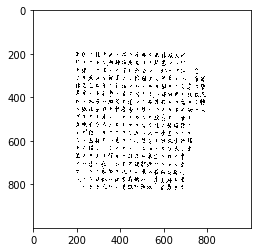

In [2]:
#feature extraction using partch.
import os
from matplotlib.pyplot import imread
train_images = []
path = "../Image_processing/result"
for file in os.listdir(path):
    if file.endswith(".png"):
        im = imread(path + "/" + file)
        im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        if(im.size == 3000000):  #abandon some blank imgs
            train_images.append(im)
plt.imshow(train_images[0])
plt.show()


Before splitting, the image size is (1000, 1000, 3)
After splitting, the patches are (64, 125, 125, 3)
A patch is like:


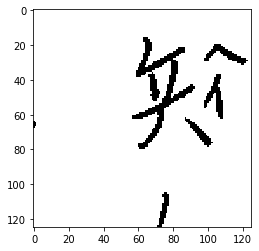

In [3]:
#feature extraction using partch.
from patchify import patchify
def patchify_images(image):
    a = 125
    return patchify(image, (a, a, 3), step=a).reshape((-1, a, a, 3))

patches = patchify_images(train_images[2])
print(f'Before splitting, the image size is {train_images[2].shape}')
print(f'After splitting, the patches are {patches.shape}')
print('A patch is like:')
plt.imshow(patches[5])
plt.show()
def compute_patch_feature(patch):
    #YOUR CODE HERE
    Red,Green,Blue = patch[:,:,0],patch[:,:,1],patch[:,:,2]
    meanRed = np.mean(Red)
    meanGreen = np.mean(Green)
    meanBlue = np.mean(Blue)
    return [meanRed,meanGreen,meanBlue]

train_points = []  #can't do futher work since xiang da li's work is incomplete, some of output img is blank.

for img in train_images:
    patches = patchify_images(img)
    for patch in patches:
        train_points.append(compute_patch_feature(patch))


In [99]:
np.array(train_points)[:5]

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

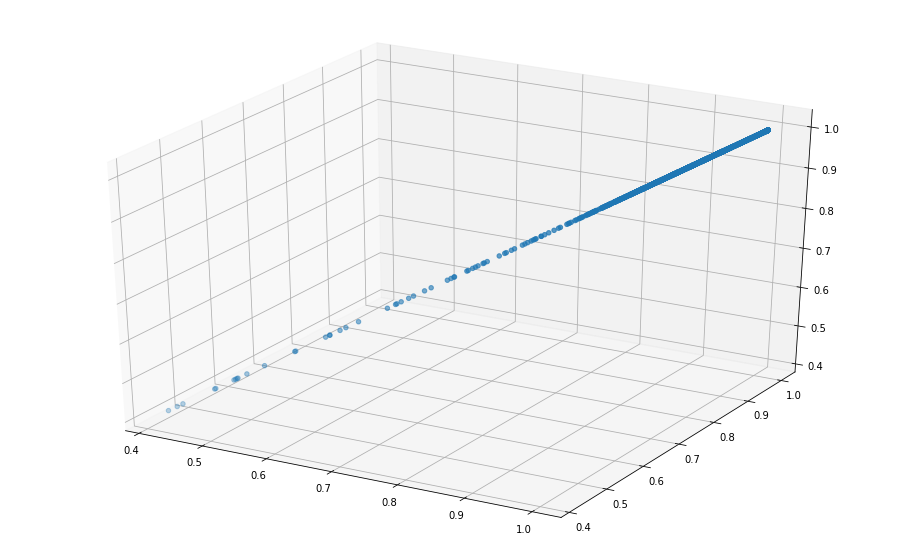

In [7]:
#X = np.load("./data.npy")
X = np.array(train_points)
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:, 2])
plt.show()

In [98]:
X

array([[ 1.34727627, -2.90595446,  1.41975997],
       [-1.35344631,  8.16493032,  9.09206015],
       [ 1.32031164,  3.19447231,  2.39732503],
       ...,
       [ 1.86414501, -1.66079625,  2.34211436],
       [-0.87473073,  8.04113656, 10.24338379],
       [ 0.79735259,  4.10027697,  2.45196012]])

First off, some definitions:

$X$ is a dataset contains 800 data. Each data has 3 dimensions. They are represented by a three dimensional Gaussian Mixture Model.

$K$ is the total number of gaussians. This is just like the $K$ means you had for k-means in assignment 2. Each gaussian is named $k$, where $k$ is the unique number associated with that gaussian. Each $k$ has a mean and covariance matrix associated with it. This allows you to construct a gaussian which is just a formula which can be used to generate data points or to compute the probability that a given data point is generated from this gaussian (look up generative models if you're curious to learn more). For this purpose, you can use np.random.multivariate_normal().

$\Sigma$ is a list of covariance matrices $\Sigma_k \in \mathbb{R}^{m \times m}$, which are symmetric positive semidefinite matrices.

$\mu$ is a list of means, each one $\mu_k \in \mathbb{R}^{m}$ associated with gaussian $k$.

$N$ is the total number o
f datapoints.

$responsibilities \in [0, 1]^{N \times K}$ is a matrix. Every column $k$ of $responsibilities$ is associated with the $k^{th}$ gaussian. Each element $r_{ik}$ of the $k^{th}$ column is the probability of the $i^{th}$ datapoint $x_i$ (the $i^{th}$ row of $X$) given the gaussian $k$.

$N_k$ is the sum of the $k^{th}$ column of $responsibilities$. In other words, there is one $N_k$ for each gaussian. $N_k = \sum_i r_{ik}$.

$\pi$ is a list of probabilies, 1 associated with each gaussian. $\pi_k$ is the probability of gaussian $k$. $\pi_k = \frac{N_k}{N}$.

---

   **TASK 1:** Complete the below function to initialise your parameters. You will need to generate:
   1. A list $\mu$ of $K$ means, each of which is in $\mathbb{R}^{m}$.
   2. A list $\Sigma$ of $K$ covariance matrices in $\mathbb{R}^{m \times m}$. Remember, covariance matrices must be symmetric positive semidefinite.
   3. A list $\pi$ of $K$ probabilities $\pi_k$. They should be initialised at $\frac{1}{K}$ (uniformly distributed at first).

Do not hard code parameters. You should generate them with some randomness, and your code must work for any $m$, $k$ and $N$.

You need to intelligently select $\mu_k$ just like you did with k-means. Poorly initialised parameters may result in an entirely broken EM algorithm.

---

In [108]:
def initialise_parameters(X, K):
    # YOUR CODE HERE
    #mu
    mu = X[np.random.choice(X.shape[0],K)]
    #pi
    pi = []
    for i in range(K):
        pi.append(1/K)
    pi = np.array(pi)
    #cov[]
    sigma = []
    for k in range(K):
        vector = np.array(mu[k])
        sigma.append(vector.transpose()@vector+np.identity(X.shape[1], dtype = int))

    return sigma, mu, pi
    
K = 4
sigma, mu, pi = initialise_parameters(X[:, :3], K)
print('\nSigma: \n', sigma)
print('\nMu: \n', mu)
print('\nPi: \n', pi)


Sigma: 
 [array([[13.16764381, 12.16764381, 12.16764381],
       [12.16764381, 13.16764381, 12.16764381],
       [12.16764381, 12.16764381, 13.16764381]]), array([[11.06577225, 10.06577225, 10.06577225],
       [10.06577225, 11.06577225, 10.06577225],
       [10.06577225, 10.06577225, 11.06577225]]), array([[30.40711531, 29.40711531, 29.40711531],
       [29.40711531, 30.40711531, 29.40711531],
       [29.40711531, 29.40711531, 30.40711531]]), array([[31.87581815, 30.87581815, 30.87581815],
       [30.87581815, 31.87581815, 30.87581815],
       [30.87581815, 30.87581815, 31.87581815]])]

Mu: 
 [[ 1.46581884 -1.13840594  2.95348114]
 [-2.01872124 -1.09524034  2.18883197]
 [ 0.40957246  4.06163781  3.56965881]
 [ 1.98551461  5.0171769   1.3272098 ]]

Pi: 
 [0.25 0.25 0.25 0.25]


$E\_step$ computes the matrix $responsibilities \in [0, 1]^{N \times K}$, where $N$ is the number of data points, and $K$ is the number of gaussians you're attempting to cluster the data with. Each gaussian will be associated with a column of $responsibilities$. As your algorithm runs, each row represents a data point $x_i$, and each column of that row will contain the probability that $x_i$ came from that gaussian, $p(x_i \mid k)$, signifying the extent to which this datapoint $x_i$ has been assigned to the gaussian associated with that column. 

---

**TASK 2:** Implement $E\_step(\pi, \mu, \Sigma, X) = responsibilities$, which updates the $responsibilities$ matrix.

Remember, which gaussian a datapoint is assigned to depends on the probability of that datapoint given that gaussian.

**HINT:** 
- Each element of responsibilities $r_{ik} = \frac{\pi_k \mathcal{N}(x_i \mid \mu_k \Sigma_k)}{\sum_j \pi_j \mathcal{N}(x_i \mid \mu_j \Sigma_j)}$, where $x_i$ is the $i^{th}$ row of $X$.
- https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.multivariate_normal.html
- Use $multivariate\_normal.pdf(x, \mu_k, \Sigma_k)$

---

In [109]:
from scipy.stats import multivariate_normal
def E_step(pi, mu, sigma, X):
    # YOUR CODE HERE
    result = np.zeros((X.shape[0],len(pi)))
    numerator = 0
    
    denominator = 0
    for j in range(len(pi)):
        denominator += pi[j]*multivariate_normal.pdf(X,mean = mu[j], cov = sigma[j])


    for k in range(len(pi)):
        numerator = pi[k]*multivariate_normal.pdf(X,mean = mu[k], cov = sigma[k])
        result[:,k] = numerator/denominator
            
        
    return result

responsibilities = E_step(pi, mu, sigma, X[:, :3])
print(responsibilities)

[[9.98586234e-01 1.41359129e-03 1.70499314e-07 3.82794701e-09]
 [1.72844356e-11 3.40917418e-03 9.96590735e-01 9.10720773e-08]
 [2.25931498e-03 3.09394399e-02 6.83292469e-01 2.83508776e-01]
 ...
 [9.95318885e-01 4.67946445e-03 1.62381175e-06 2.63919699e-08]
 [2.50496574e-10 2.86223011e-02 9.71377688e-01 1.10131935e-08]
 [2.37798300e-05 3.62666124e-03 7.28896221e-01 2.67453338e-01]]


---

**TASK 3:** Implement $M\_step(responsibilities, X) = \mu, \Sigma, \pi$ which returns the updated means and covariances for all of the $k$ gaussians, along with the priors $\pi$.

**HINT:** 
- https://docs.scipy.org/doc/numpy/reference/generated/numpy.outer.html

---

In [110]:
def M_step(r, X):
    # YOUR CODE HERE
    K = r.shape[1]
    newsigma = np.zeros((K,X.shape[1],X.shape[1]))
    newpi = []
    newmu = np.zeros((K,X.shape[1]))
    for k in range(K):
        # mu
        numerator = 0
        denominator = 0
        r_new = r[:,k]
        for n in range(X.shape[0]):
            denominator += r[n][k]
        if(denominator == 0):
            print("denominator = 0 in M step when k = ",k)
        numerator = (r_new.T@X)
        newmu[k] = numerator/denominator
        #sigma
#         value = np.zeros((X.shape[1],X.shape[1]))
#         for n in range(X.shape[0]):
#             value += r[n][k]*(np.outer(np.matrix(X[n]-mu[k]),(np.matrix(X[n]-mu[k]).transpose())))
        
#         newsigma.append(value/sum(r[:,k]))   
        num2 = 0
        for n in range(X.shape[0]):
            matrix = np.matrix(X[n]-newmu[k])
            num2 += r[n,k] * (np.outer(matrix,matrix.T))
        newsigma[k] = num2/denominator   
        #pi
        newpi.append(denominator/X.shape[0])
    return newmu, newsigma, newpi

mu, sigma, pi = M_step(responsibilities, X[:, :3])
print('\nSigma: \n', sigma)
print('\nMu: \n', mu)
print('\nPi: \n', pi)


Sigma: 
 [[[ 0.81842814  0.06738719  0.03355472]
  [ 0.06738719  0.8573555   0.03040629]
  [ 0.03355472  0.03040629  0.88726957]]

 [[ 1.00639353 -0.95102469 -1.10666676]
  [-0.95102469 11.54672073 10.16859726]
  [-1.10666676 10.16859726 10.91798036]]

 [[ 1.71065597 -1.58014899 -2.80230624]
  [-1.58014899  4.11841942  5.76571733]
  [-2.80230624  5.76571733 10.5429729 ]]

 [[ 0.82925904  0.03074332  0.12960489]
  [ 0.03074332  0.94282098  0.05592757]
  [ 0.12960489  0.05592757  0.79025259]]]

Mu: 
 [[ 1.17167785 -1.716582    2.83905387]
 [-0.33000564  1.615244    5.32688758]
 [-0.68903457  6.72582907  7.21098248]
 [ 1.2799044   4.37252106  1.39619462]]

Pi: 
 [0.26969806075350744, 0.09993340243738082, 0.4347301561118651, 0.1956383806972459]


---

**TASK 4:** Implement $classify(\pi, \mu, \Sigma, x) = k$ which takes an unknown example $x \in \mathbb{R}^{m}$, the means $\mu$ and covariance matrices $\Sigma$ and the priors $\pi$, and returns $k$, the number of the gaussian which maximises the probability of $x$.

In other words, ${arg max}_k \left(p(x \mid \mu_k, \Sigma_k)\pi_k \right)$.

---

In [111]:
def classify(pi, mu, sigma, x):
    # YOUR CODE HERE
    result = []
    for k in range(len(pi)):
        p = pi[k]*multivariate_normal.pdf(x,mu[k], sigma[k])
        result.append(p)
    return np.argmax(result)
print(classify(pi, mu, sigma, X[270, :3]))

2


---

**TASK 5:** Implement $EM(X, K, iterations) = \mu, \Sigma, \pi$ which: 
1. takes a dataset $X \in \mathbb{R}^{N \times m}$ and $K$, an integer indicating how many gaussians will be used to cluster the data, and $iterations$ the number of iterations to be performed.
2. uses all of the functions you completed above to initialise parameters and find the optimal means $\mu$, covariances $\Sigma$ and priors $\pi$ to cluster the data points (a gaussian mixture model).

---

 running,  running,  running,  running,  running,  running,  running,  running,  running,  running,  running,  running,  running,  running,  running,  running,  running,  running,  running,  running,  running,  running,  running,  running,  running,  running,  running,  running,  running,  running, 
Sigma: 
 [[[ 0.88084872  0.05723986 -0.02382201]
  [ 0.05723986  1.00251614 -0.01567987]
  [-0.02382201 -0.01567987  1.04316265]]

 [[ 1.0907788  -0.13426416 -0.00661893]
  [-0.13426416  0.92850082  0.07239302]
  [-0.00661893  0.07239302  0.89267635]]

 [[ 0.95588032  0.00505882 -0.00603556]
  [ 0.00505882  1.00363664  0.02709631]
  [-0.00603556  0.02709631  0.8815131 ]]]

Mu: 
 [[ 1.03774193  4.21660208  1.86993146]
 [ 0.91171334 -1.55016013  2.90463154]
 [-1.25357656  7.775087    9.36231957]]

Pi: 
 [0.3342131247114651, 0.33328692956333866, 0.3324999457251962]


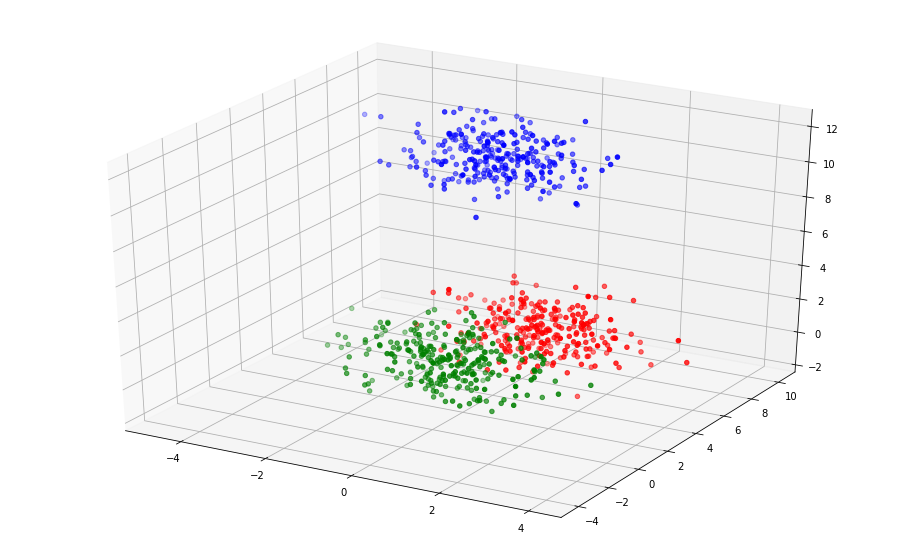

In [112]:

def EM(X, K, iterations):
    # YOUR CODE HERE
    sigma,mu,pi = initialise_parameters(X,K)
    for i in range(iterations):
        r = E_step(pi,mu,sigma,X)
        mu,sigma,pi = M_step(r,X)
        print(" running",end = ", ")
    return mu,sigma,pi


#Test code. Leave it aloooooone!
iterations = 30
K = 3
# K = len(train_images)
# 
# for i in range(K):
#     mu_1, sigma_1, pi_1 = EM(X[:, :3], K, iterations)

mu_1, sigma_1, pi_1 = EM(X[:, :3], K, iterations)

print('\nSigma: \n', sigma_1)
print('\nMu: \n', mu_1)
print('\nPi: \n', pi_1)

def allocator(pi, mu, sigma, X, k):
    N = X.shape[0]
    cluster = []
    for ix in range(N):
        prospective_k = classify(pi, mu, sigma, X[ix, :])
        if prospective_k == k:
            cluster.append(X[ix, :])
    return np.asarray(cluster)

colours = ['r', 'g', 'b']
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection='3d')
for k in range(K):
    cluster = allocator(pi_1, mu_1, sigma_1, X[:, :3], k)
    ax.scatter(cluster[:,0], cluster[:,1], cluster[:, 2], c=colours[k])
plt.show()

---
**Task 6**: Image segmentation is the process of assigning a label to every pixel in an image such that pixels with the same label share certain characteristics. In this task, we are going to implement a simple image segmentation algorithm using GMM. 

The *image_segmentation* function should satisfy the following specifications:
* Inputs:
    - image: the image to be segmented. Type: np.ndarray
    - K: the number of gaussians.
    - iterations: the number of iterations of EM algorithm.
* Return:
    - a matrix, each element of this matrix corresponds to the class of pixels of the input image matrix. Type: np.ndarray. dtype: np.int32.
    - For an image with shape (78,78,3), the shape of returned matrix should be (78,78).

Make sure your code can run within 3 mins.

**Read more:** https://en.wikipedia.org/wiki/Image_segmentation

**Hints:** Remember to use the functions you defined above.

---

Let's load the image to be segmented first.

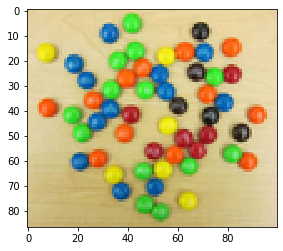

In [9]:
image = plt.imread('mandm.png')
plt.imshow(image)
plt.show()

 running,  running,  running,  running,  running,  running,  running,  running,  running,  running, 5
finishEM
It takes 12.451201438903809 seconds to segement the image.


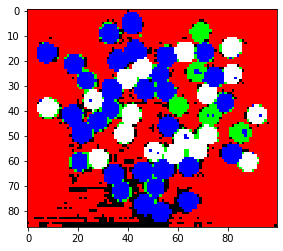

In [20]:

def image_segmentation(image, K, iterations):
    X,Y,Z = image.shape
    data = []
    for x in range(X):
        for y in range(Y): # reshape it to 8700*3
            data.append(image[x,y,:3])
    data = np.array(data)
    rdata = data
    sigma,mu,pi = initialise_parameters(data,K)
    mu_1, sigma_1, pi_1 = EM(data[:, :3], K, iterations)
    print(len(pi_1))
    omu,osigma,opi = mu_1, sigma_1, pi_1 
    print("finishEM")
    
    result = []
    #find the best gaussian k of each point in data 
    for i in range(data.shape[0]):
        k = classify(pi_1, mu_1, sigma_1, data[i,:3])
        result.append(k)
    result = np.reshape(result,(X,Y)) # 8700*1 => 87*100
    
    return result
    pass

K=5

# test code, leave it alone!
import time
start = time.time()
gmm_labels = image_segmentation(image, 5, 10)
end = time.time()
print(f'It takes {end-start} seconds to segement the image.')
colors = [[255, 0, 0], [0, 255, 0], [0, 0, 255], [255, 255, 255], [0, 0, 0]]
segemented_image = np.zeros_like(image, dtype=np.int32)
m, n, _ = segemented_image.shape
for i in range(m):
    for j in range(n):
        segemented_image[i, j] = np.array(colors[gmm_labels[i, j]])
plt.imshow(segemented_image)
plt.show()

Your answer should look like this, maybe with different colors:
![image](./segmented_image.png)